## Analysis of latency for BlueStore (4k 60s randwrite)

Average BlueStore Latency over 10000 datapoints= 0.0006905617481000006 s
Average BlueStore Latency of all datapoints= 0.0012006043490964602 s


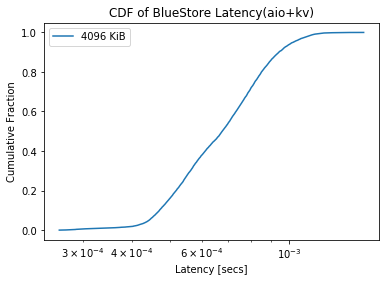

Average Workload Latency = 0.003809424631955 s
Average Throughput = 49.14952278137207 MB/s


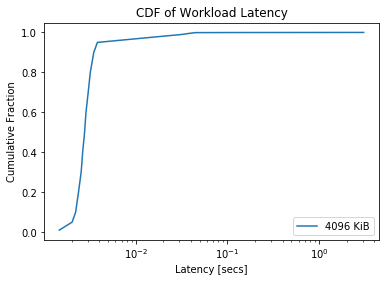

In [8]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import pandas as pd
import json

x1 = []
y1 = []
f1='dump_total_bluestore_simple_write_lat_vec-48.csv'
data1=read_csv(f1, header=0, skiprows=10000, nrows=10000, parse_dates=True, squeeze=True).sort_values(ignore_index=True)
avg_bs_lat_partial = sum(data1) / len(data1)
alldata1 = read_csv(f1, header=0, parse_dates=True, squeeze=True)
avg_bs_lat_all = sum(alldata1) / len(alldata1)
print("Average BlueStore Latency over 10000 datapoints=",avg_bs_lat_partial,"s")
print("Average BlueStore Latency of all datapoints=",avg_bs_lat_all,"s")
for i in range(0, 10000, 2):
    x1.append(data1[int(i/10000. * len(data1))])
    y1.append(i/10000.)

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(x1, y1, label='4096 KiB')
ax.set(xlabel='Latency [secs]', ylabel='Cumulative Fraction', title='CDF of BlueStore Latency(aio+kv)')
plt.legend()
plt.show()
plt.close()

with open('dump-fio-bench-48.json') as f:
  data2 = json.load(f)
avg_lat = data2['jobs'][0]['write']['clat_ns']['mean']/1000000000
avg_throughput = data2['jobs'][0]['write']['bw_bytes']/1048576
print("Average Workload Latency =",avg_lat,"s")
print("Average Throughput =",avg_throughput,"MB/s")
x2 = []
y2 = []
for key, value in data2['jobs'][0]['write']['clat_ns']['percentile'].items():
    x2.append(value/1000000000)
    y2.append(float(key)/100)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(x2, y2, label='4096 KiB')
ax.set(xlabel='Latency [secs]', ylabel='Cumulative Fraction', title='CDF of Workload Latency')
plt.legend()
plt.show()
plt.close()



